# A/B тест

### Цель проекта: 

приоритизация гипотез и анализ результатов А/В теста

### Задачи проетка:
    
    1. выявить приоритетные гипотезы
    2. изучить результаты А/В теста
    3. сделать выводы

#### Описание данных

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Структуры проекта:
    
##### 1. Изучение общей информации
*[jump to code cell 1](#cell1)

##### 2. Преобработка данных 
*[jump to code cell 2](#cell2)

##### 3. Анализ данных:

- Приоритизация гипотез *[jump to code cell 9](#cell9)

- Анализ выручки и среднего чека   *[jump to code cell 3](#cell3)

- Анализ конверсии   *[jump to code cell 4](#cell4)

- Выявление аномалий                   *[jump to code cell 6](#cell6)

- Сравнение стат значимости "по сырым" и "по очищенным" данным                   *[jump to code cell 7](#cell7)

- Результат теста и вывод   *[jump to code cell 8](#cell8)



## Общая информация

<a id="cell1"></a>

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import datetime as dt
import math as mth
import matplotlib.pyplot as plt

In [2]:
hypo=pd.read_csv('hypothesis.csv')

In [3]:
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypo.dtypes

Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Efforts        int64
dtype: object

Представлены 9 различных гипотез с бальной оценкой. Тип данных представлн верно. Можно только для удобства работы привести наименования столбцов к нижнему регистру

In [5]:
orders=pd.read_csv('orders.csv')

In [6]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [7]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [8]:
# ищем дубликаты
orders.duplicated().sum()

0

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders['visitorId'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
3717692402     5
              ..
3254689071     1
4186744110     1
1455861274     1
3612778094     1
3149228032     1
Name: visitorId, Length: 1031, dtype: int64

1031 покупателями было совершено 1197 заказов, т.е в основном каждый пользователь заказал в интернет магазине 1 раз. В таблице о заказах все хорошо, кроме даты: необходимо изменить тип данных

In [11]:
orders.groupby('group')['revenue'].sum()

group
A    4084803
B    5907760
Name: revenue, dtype: int64

In [12]:
visits=pd.read_csv('visitors.csv')

In [13]:
visits.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [14]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
# ищем дубликаты
visits.duplicated().sum()

0

In [16]:
visits['date'].max()

'2019-08-31'

In [17]:
visits['date'].min()

'2019-08-01'

Эксперемент проводился 1 месяц (с 1 по 31 августа). В данных о песетителях необходимо также изменить тип данных у даты


In [18]:
visits.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

#### ВЫВОД

В проекте представлены 9 различных гипотез для выявления приоритетных.
Также для анализа предоставлены результаты А/В теста проведенного в августе 2019 г. Выборка групп А и В практически одинаковая (18736 и 18916 посетителей). По абсолитной суммарной выручке группа В показала себя лучше.
Для проведения дальнейшего анализа необходимо: привести к нижнему регистру названия столбцов в данных о гипотезах, изменить тип данных дат.Среди данных дубликатов не выявлено


## Преобработка данных

<a id="cell2"></a>

In [19]:
# приведем к нижнему регистру названия столбцов таблицы гипотез
hypo.columns = hypo.columns.str.lower()

In [20]:
hypo

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [21]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [22]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [23]:
orders.dtypes

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

In [24]:
visits.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

Данные преобработали - можно приступать к анализу данных

# Анализ данных

### Приоритизация гипотез

<a id="cell9"></a>

Для выбора какую гипотезу будем тестировать воспользуемся двумя методами: ICE и RICE

In [25]:
hypo

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [26]:
# для удобства анализа добавим порядковый номер гипотез
hypo['number']=[1,2,3,4,5,6,7,8,9]

In [27]:
hypo

,hypothesis,reach,impact,confidence,efforts,number
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,1
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,4
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,5
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,6
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,7
7,Добавить форму подписки на все основные страни...,10,7,8,5,8
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,9


In [28]:
# расчитаем показатель ICE
hypo['ICE']=((hypo['impact']*hypo['confidence'])/hypo['efforts']).astype(int)
hypo[['number','hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,number,hypothesis,ICE
8,9,"Запустить акцию, дающую скидку на товар в день...",16
0,1,"Добавить два новых канала привлечения трафика,...",13
7,8,Добавить форму подписки на все основные страни...,11
6,7,Показать на главной странице баннеры с актуаль...,8
2,3,Добавить блоки рекомендаций товаров на сайт ин...,7
1,2,"Запустить собственную службу доставки, что сок...",2
3,4,"Изменить структура категорий, что увеличит кон...",1
4,5,"Изменить цвет фона главной страницы, чтобы уве...",1
5,6,"Добавить страницу отзывов клиентов о магазине,...",1


По соотношении влияния на пользователей и усилий по проведению тестирования лидируют 3 гипотезы: №9,№1,№8. Добавим к анализу оценку охвата аудитории и посмотрим изменится или нет ранжирование гипотез

In [29]:
# расчитаем показатель RICE 
hypo['RICE']=(hypo['reach']*hypo['impact']*hypo['confidence'])/hypo['efforts']
hypo[['number','hypothesis','RICE']].sort_values(by='RICE',ascending=False)

,number,hypothesis,RICE
7,8,Добавить форму подписки на все основные страни...,112.0
2,3,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,1,"Добавить два новых канала привлечения трафика,...",40.0
6,7,Показать на главной странице баннеры с актуаль...,40.0
8,9,"Запустить акцию, дающую скидку на товар в день...",16.2
3,4,"Изменить структура категорий, что увеличит кон...",9.0
1,2,"Запустить собственную службу доставки, что сок...",4.0
5,6,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,5,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [30]:
hypo['hypothesis'].tolist()

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Запустить собственную службу доставки, что сократит срок доставки заказов',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Запустить акцию, дающую скидку на товар в день рождения']

##### ВЫВОД

Лидирующая гипотеза №9 по методике ICE при применении RICE оказалась на 5-ом месте, а гипотеза №8 с 3-го места перешла на 1-е (причем с большим отрывом от остальных гипотез). Гипотеза №1 со 2-го места на 3-е и гипотеза №3 с 5-го места перешла на 2-е.
Данный метод (RICE) показывает что очень ваыжно при отборе гипотез учитывать не только силу влияния гипотез, но и охват аудитории. 
Необходимо проводить эксперемент для гипотезы №8: добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

## АНАЛИЗ РЕЗУЛЬТАТОВ А/В ТЕСТА

#### Анализ выручки и среднего чека

<a id="cell3"></a>

In [31]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [32]:
visits.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [33]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [34]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups\
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
    .sort_values(by=['date','group'])

In [35]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [36]:
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = datesGroups\
  .apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]\
         .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [37]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [38]:
# объядиним 2 таблицы в одну и переименуем названия столбцов
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [39]:
cumulativeData.columns=['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [40]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


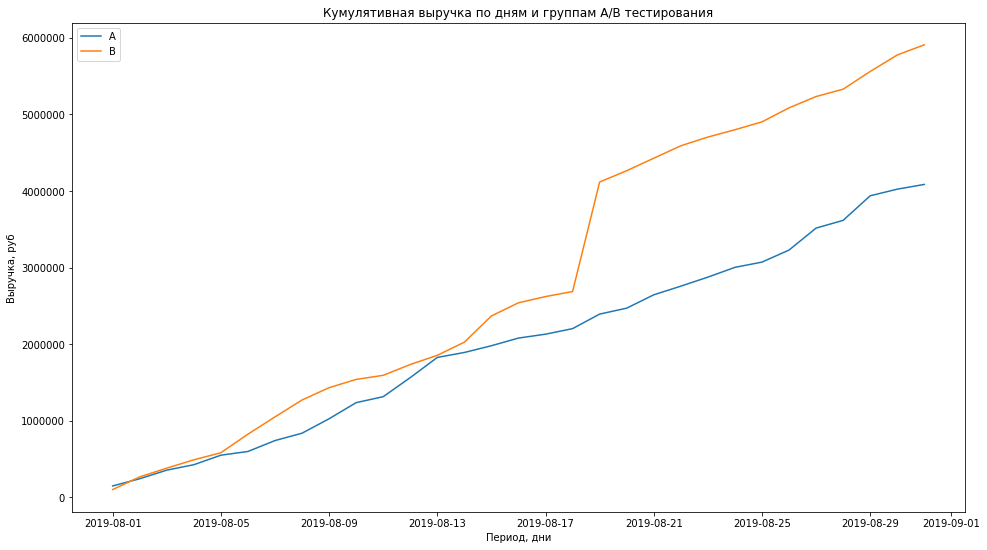

In [41]:
# построим графики кумулятивной выручки по дням и группам A/B-тестирования:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.subplots(figsize=(16, 9))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xlabel('Период, дни') 
plt.ylabel('Выручка, руб') 
plt.title('Кумулятивная выручка по дням и группам А/В тестирования');

Выручки обоих групп равномерно растут, но 18 августа у группы В резкий скачек выручки - что говорит об очень больших заказах (выбросы). Посмотрим как меняется средний чек в 2-ч подгруппах

Text(0.5, 1.0, 'Динамика кумулятивного среднего чека по дням и группам А/В тестирования')

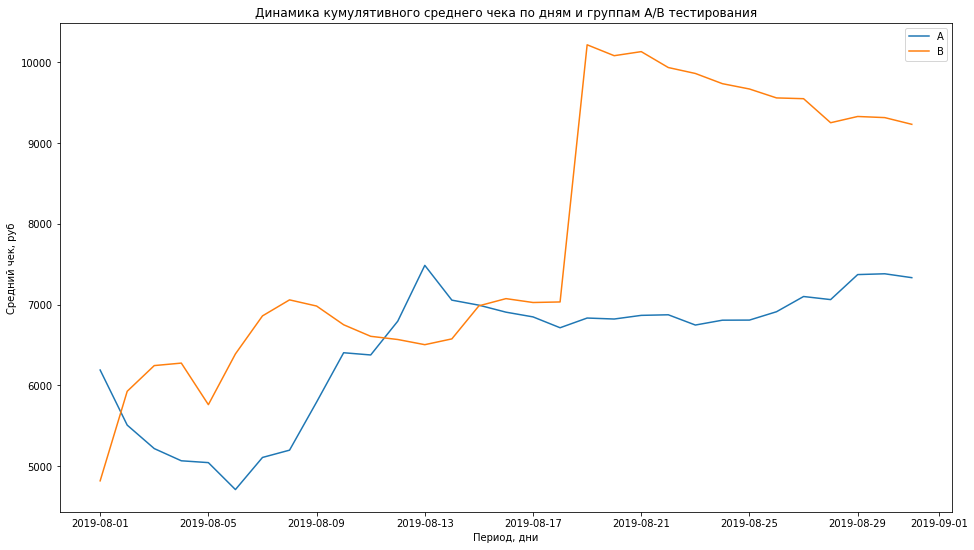

In [42]:
# построем график кумулятивного среднего чека по группам
plt.subplots(figsize=(16, 9))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Период, дни') 
plt.ylabel('Средний чек, руб') 
plt.title('Динамика кумулятивного среднего чека по дням и группам А/В тестирования')

В целом у группы В лучше динамика и выручки и среднего чека, но у группы В большие выбросы (крупный заказ). Данные выбросы влияют на средние показатели и не позволяют правильно сравнить результаты эксперемента. Очищать данные от выбросов будем в дальнейшем, а пока посмотрим соотношение среднего чека группы В к среднему чеку группы А и проанализируем конверсию

In [43]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA\
     .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Text(0.5, 1.0, 'Относительное изменение кумулятивного среднего чека группы В к группе А')

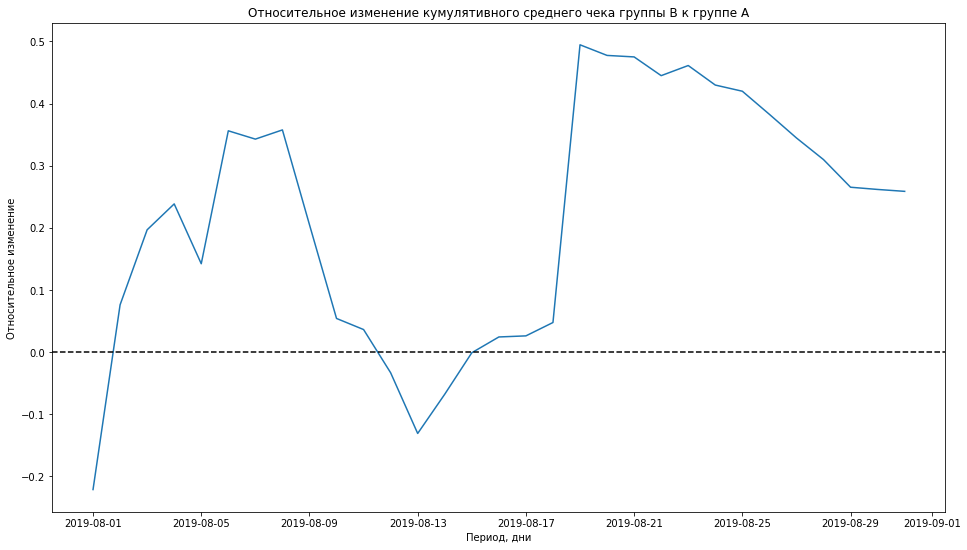

In [44]:
# построем график относительного изменения кумулятивного среднего чека группы B к группе A
plt.subplots(figsize=(16, 9))
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Период, дни') 
plt.ylabel('Относительное изменение') 
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')

Скачки графика опять же показывают наличие крупных заказов. В основном средний чек группы В преобладал над средним чеком группы А (средний чек был меньше только с 1 по 2 августа и с 11 по 15 августа). В целом можно сказать что эксперемент прошел удачно, но что покажет относительная динамика среднего чека после удаления выбросов посмотрим позже. А пока проанализируем конверсию.

## Анализ конверсии

<a id="cell4"></a>

In [45]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [46]:
# срез по группам
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Text(0.5, 1.0, 'Кумулятивная конверсия по дням и группам А/В тестирования')

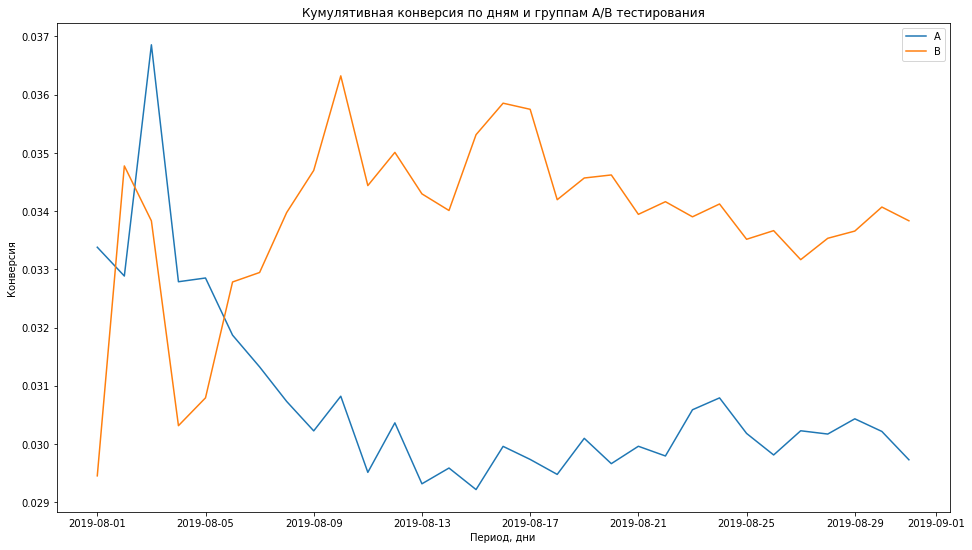

In [47]:
# строим графики
plt.subplots(figsize=(16, 9))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Период, дни') 
plt.ylabel('Конверсия') 
plt.title('Кумулятивная конверсия по дням и группам А/В тестирования')

Опять же конверсия в покупку выше у группы В: на первом этапе эксперимента наблюдалось небольшое преобладание конверсии группы А над группой В, но уже менее чем через неделю резкий скачок конверсии у группы В (также выбросы) и конверсии у обоих групп зафиксировались на одном уровне, причем у группы В конверсия в покупку превышает

In [48]:
# для того чтобы построить график относительного различия кумулятивных конверсий объединим таблицы
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
   .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

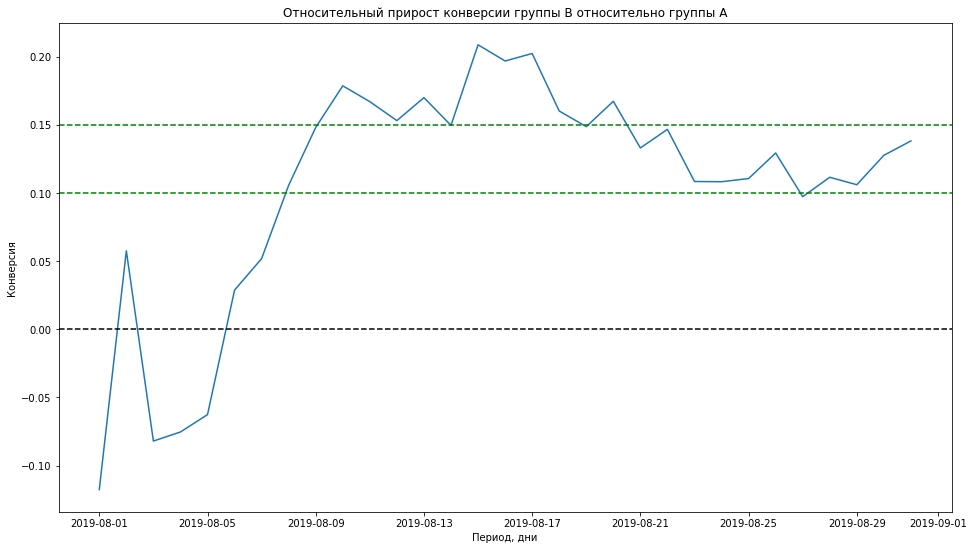

In [49]:
# построим график
plt.subplots(figsize=(16, 9))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xlabel('Период, дни') 
plt.ylabel('Конверсия') 
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='green', linestyle='--')
plt.axhline(y=0.15, color='green', linestyle='--')

У группы В относительно груяппы А выше конверсия. В самом начамле эксперимента было снижение , но потом скачок конверсии в покупку и относительное преобладание кумулятивной конверсии зафиксировалось на одном уровне (10-15%)

#### ВЫВОД

Проанализировав результаты А/В теста можно сказать о положительных результатах:

- общая суммарная выручка полученная от группы В выше;
- кумулятивная выручка у обоих групп повышалась, но за весь период эксперемента у группы В она ябыла выше;
- средняя кумулятивная выручка полученная от одного пользователя (средний чек) также в основном была выше у "В", но наблюдается значительный скачок среднего чека! От данных выбросов следует очистить выборку;
- соответсвенно относительное изменение среднего чека также выше у "В";
- в кумулятивной конверсии обоих групп в начале эксперимента наблюдаялся резкий скачной, но у группы А конверсия пошла на спад, а у группы В наоборот рост; т.е в группе В не только больше покупающих пользователей, но и пользователей готовых тратить больше;
- график относительного прироста конверсии также показал преобладание группы В

Но данное преимущество возможно возникло за счет крупных покупок. Для более точного сравнения групп необходимо выявить и избавиться от аномалий, т.е как бы усреднить группы.
Продолжим анализировать данные

### Анализ выбросов

<a id="cell6"></a>

###### Выбросы среди количества заказов

In [50]:
# подсчитаем количество заказов по пользователям
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1)\
  .groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
  
ordersByUsers.columns = ['userId','orders']

In [51]:
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть количество заказов 8,9 и 11. Посмотрим отличаетются ли данное количество от среднего

Text(0.5, 1.0, 'Распределение количества заказов')

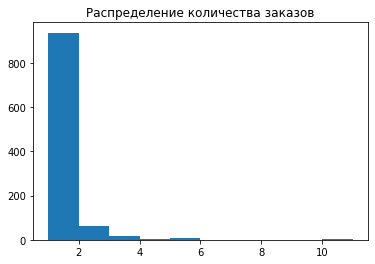

In [52]:
# построим гистрограмму распределения количества заказов на одного пользователя
plt.hist(ordersByUsers['orders'])
plt.title('Распределение количества заказов')

Text(0.5, 1.0, 'Точечная диаграмма числа заказов на одного пользователя')

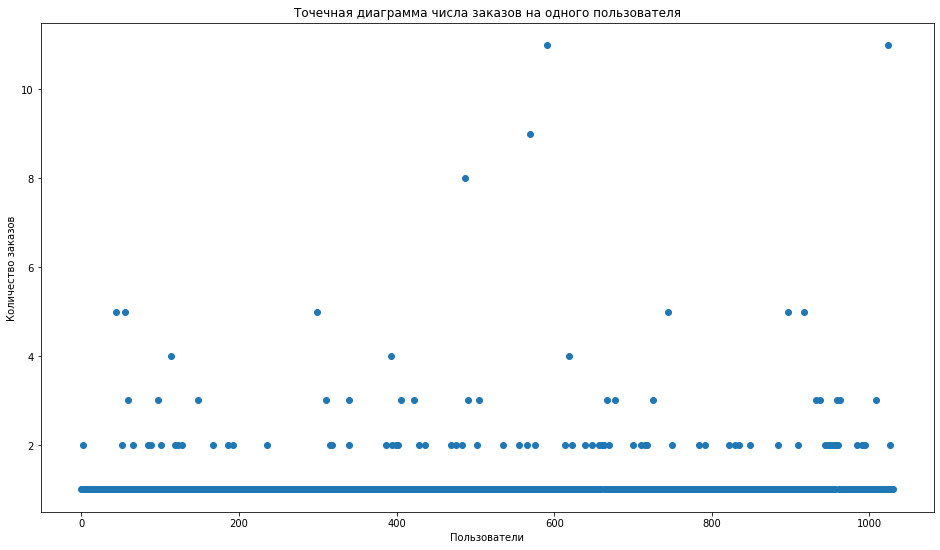

In [53]:
 # в основном заказываю 1 раз. Более точно распределение нам покажет точечная диаграмма числа заказов на одного пользователя:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.subplots(figsize=(16, 9))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Пользователи') 
plt.ylabel('Количество заказов') 
plt.title('Точечная диаграмма числа заказов на одного пользователя')

Точечный график показал наличие небольшого количества заказов более 4. Посмотрим долю этих выбросов

In [54]:
np.percentile(ordersByUsers['orders'], [95,96,97,98,99])

array([2., 2., 2., 3., 4.])

Не более 5% пользователей оформляли заказ более 2 раз, не более 2% - более 3 раз, не более 1% - более 4 раз

In [55]:
ordersByUsers[ordersByUsers['orders']>=3]['userId'].value_counts().count()

30

In [56]:
ordersByUsers[ordersByUsers['orders']>=4]['userId'].value_counts().count()

13

In [57]:
ordersByUsers['userId'].value_counts()

2134820861    1
3283584911    1
1255412427    1
2406916810    1
2188683977    1
             ..
749837663     1
3647934575    1
3937582421    1
2592727107    1
2733145037    1
Name: userId, Length: 1031, dtype: int64

In [58]:
ordersByUsers[ordersByUsers['orders']>=2]['userId'].count()

94

Из 1031 пользователей, 13 пользователей заказали более 4 раз, 30 пользователей заказали 3 раз. 30 пользователей это всего 2.9% аудитории . При дальнейшем анализе не будем учитывать пользователей заказавших более 3 раз

###### Выбросы среди стоимости заказов

Text(0.5, 1.0, 'Распределение пользователей по стоимости заказов')

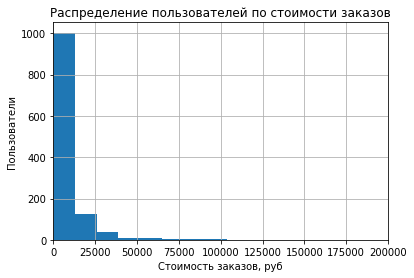

In [59]:
# изучим гистограмму распределения стоимостей заказов:
plt.xlim(0,200000)
orders['revenue'].hist(bins=100)
plt.xlabel('Стоимость заказов, руб') 
plt.ylabel('Пользователи') 
plt.title('Распределение пользователей по стоимости заказов')

In [60]:
orders['revenue'].sort_values(ascending=False)

425     1294500
1196     202740
858       93940
1136      92550
744       86620
         ...   
1013         60
459          50
756          50
1091         50
584          50
Name: revenue, Length: 1197, dtype: int64

In [61]:
orders['revenue'].median()

2978.0

Заказы от 50 до 1.3 млн при средней стоимости заказа 2978 - необходимо отсекать излишне высокие заказы

Text(0.5, 1.0, 'Точечная диаграмма стоимости заказа')

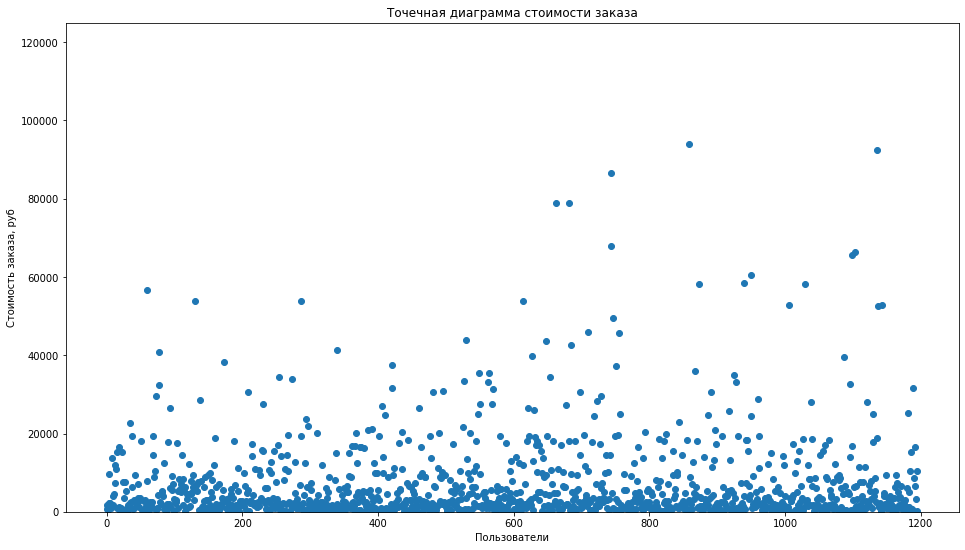

In [62]:
 # строим точечную диаграмму стоимости заказа:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.subplots(figsize=(16, 9))
plt.ylim(0,125000)
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Пользователи') 
plt.ylabel('Стоимость заказа, руб') 
plt.title('Точечная диаграмма стоимости заказа')

По графику можно оставить для дальнейшего анализа стоимость заказа от 0 до 20000. Посмотрим 95 и 99 перцентили среднего чека в выборке 

In [63]:
orders['revenue'].median()

2978.0

In [64]:
np.percentile(orders['revenue'], [95,96,97,98,99])

array([28000. , 31382. , 35485. , 44133.2, 58233.2])

In [65]:
orders[orders['revenue']>35000]['visitorId'].value_counts().count()

35

Также как и с количеством заказов отсеим 3% аудитории - будем учитывать стоимость заказов стоимостью менее 35000 руб

##### ВЫВОД

Анализ выбросов показал, что среди количества заказов и стоимости заказов есть выбросы. Расчеты показали что не более 3% пользователей заказывали более 3 раз и стоимость заказа превышали 35000 руб. Для более точного сравнения данных в дальнейшем не будем учитывать результаты данной аудитории. А пока посмотрим различаются ли конверсии и средний чек двух групп


## Статистическая значимость различий между группами

<a id="cell7"></a>

In [66]:
# расчитаем  количество пользователей в выбранную дату в группе A
visitorsADaily = visits[visits['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [67]:
# расчитаем количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
        .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [68]:
# расчитаем  количество пользователей в выбранную дату в группе В
visitorsBDaily = visits[visits['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [69]:
# расчитаем количество пользователей до выбранной даты включительно в группе В
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
        .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [70]:
# расчитаем суммарное число заказов и выручку в выбранную дату в группе A;
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [71]:
# расчитаем суммарное число заказов и выручку в выбранную в группе В;
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


In [72]:
# расчитаем суммарное число заказов и выручку до выбранной даты включительно в группе A;
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [73]:
# расчитаем суммарное число заказов и выручку до выбранной даты включительно в группе В;
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


In [74]:
# создадим общую таблицу
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [75]:
data.head(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803


In [76]:
# отдельно создадим таблицу в которой будет инфо о количестве заказов пользователей в группе А 
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']


In [77]:
# отдельно создадим таблицу в которой будет инфо о количестве заказов пользователей в группе В
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [78]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
#Тем, кто ничего не заказал, будут соответствовать нули. 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
        .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
        .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

###### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

<font color="blue">ФОРМИРУЕМ ГИПОТЕЗЫ:

H0= Конверсия группы В равна конверсии группы А

Н1= Конверсия группы В не равна конверсии группы А

In [79]:
# критический уровень значимости
аlpha = .05 

In [80]:
# считаем p-value
pvalue=stats.mannwhitneyu(sampleA, sampleB)[1]

In [81]:
"p-value {0:.3f}".format(pvalue)

'p-value 0.008'

In [82]:
# если pvalue менее критического уровеня статистической значимости, то гипотезу Н0 отвергаем :
if (pvalue < аlpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


In [83]:
# расчитаем на сколько различаются конверсии 2-х групп
"относительные различия в конверсии между группами {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)

'относительные различия в конверсии между группами 0.138'

По сырым данным p-value < 0.05 - есть различия в конверсии 2-х групп.
Т.е в результате эксперемента больше пользователей стало покупать. Причем выигрыш группы В над группой А составил 13,8%.

##### Посчитаем статистическую значимость различий в среднем чеке между сегментами по "сырым" данным

<font color="blue">ФОРМИРУЕМ ГИПОТЕЗЫ:

H0= Средний чек группы В равен среднему чеку группы А

Н1= Средний чек группы В не равен среднему чеку группы А

In [84]:
# критический уровень значимости
аlpha = .05 

In [85]:
# считаем p-value
pvalue=stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]


In [86]:
"p-value {0:.3f}".format(pvalue)

'p-value 0.365'

In [87]:
# если pvalue менее критического уровеня статистической значимости, то гипотезу Н0 отвергаем :
if (pvalue < аlpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


In [88]:
# расчитаем на сколько различаются средние чеки 2-х групп
"относительные различия в среднем чеке между группами {0:.3f}".format(orders[orders['group']=='B']\
                            ['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'относительные различия в среднем чеке между группами 0.259'

P-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Также средний чек группы B значительно выше среднего чека группы A. Теперь выполним расчеты для данных очищенных от выбросов

In [89]:
# расчитаем пользователей , которых исключим из выборки (заказ более 3 раз и стоимость более 35000)
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
dtype: int64
(39,)


Всего 39 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста

In [90]:
# выборки пользователей без "выбросов"
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']\
    .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
    .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']\
        .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
        .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

###### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

ФОРМИРУЕМ ГИПОТЕЗЫ:

H0= Конверсия группы В равна конверсии группы А

Н1= Конверсия группы В не равна конверсии группы А

In [91]:
# критический уровень значимости
аlpha = .05 

In [92]:
# считаем p-value
pvalue=stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

In [93]:
"p-value {0:.3f}".format(pvalue)

'p-value 0.007'

In [94]:
# если pvalue менее критического уровеня статистической значимости, то гипотезу Н0 отвергаем :
if (pvalue < аlpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


In [95]:
# расчитаем на сколько различаются конверсии 2-х групп

"относительные различия в конверсии между группами {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'относительные различия в конверсии между группами 0.171'

p-value опять ниже 0.05 - необходимно отвергнуть гипотезу; отностительное различие хоть и стало меньше, но все равно превышает конверсию группы А (на 17%)

##### Посчитаем статистическую значимость различий в среднем чеке между сегментами по "очищенным" данным

ФОРМИРУЕМ ГИПОТЕЗЫ:

H0= Средний чек группы В равен среднему чеку группы А

Н1= Средний чек группы В не равен среднему чеку группы А

In [96]:
# критический уровень значимости
аlpha = .05 

In [97]:
# считаем p-value
pvalue=stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]


In [98]:
# считаем p-value
"p-value {0:.3f}".format(pvalue)

'p-value 0.430'

In [99]:
# если pvalue менее критического уровеня статистической значимости, то гипотезу Н0 отвергаем :
if (pvalue < аlpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


In [100]:
"относительные различия в среднем чеке между группами {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)

'относительные различия в среднем чеке между группами 0.026'

P-value увеличилось, т.е нет причин считать что есть различия в среднем чеке двух групп .Но без учета "выбросов" значительно уменьшилось преимущество группы В над группой А (всего 2.6 %)

<font color="blue">ВЫВОД

Именно самые последние расчеты позволяют судить о том удался наш эксперимент или нет.
С уверенностью можем говорить о том , что эксперемент прошел успешно. Нововведение позволит увеличить выручку компании за счет более высокой конверсии (конверсии двух групп разные, т.е то что в группе В стало больше посетителей готовых сделать заказ - не случайно). При том что средний чек группы В относительно группы А выше, но сравнение стат значимостей говорит нам о том что тратят обе группы одинаково.

Так же можно сделать вывод о том что наличие "выбросов" не повлияло на результат А/В теста.

# ВЫВОД

<a id="cell8"></a>

С целью улучшения метрик компания прежде чем вводить какие то новшества может проводит А/В тесты. Из 9 представленных гипотез по соотношению выгоды полученной в резусльтате введения данного новшества и усилиям на проведение из всех гипотез 1-е место заняла следующая гипотеза:'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'.

РЕЗУЛЬТАТЫ А/В ТЕСТА:

Самый основной вывод и результат А/В теста: тест прошел удачно (группа В преобладает над группой А), тест необходимо завершать. Данные выводы были сделаны исходя из следующих результатов:

- общая выручка полученная от группы В выше;
- нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий;
- нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- в результате эксперемента люди не стали больше тратить (p-value 0.365), но зато больше посетителей стало покупать (статистическая значимость различий в конверсии 0.008);
- график относительного прироста конверсии группы B относительно группы A показывает преимущество группы В, причем данное преимущество зафиксировалось на определенном уровне;
- график относительного изменения кумулятивного среднего чека группы В к группе А показывет более высокие результаты у группы В, но на средний чек влияют крупные заказы. С учетом крупных заказов относительные различия в среднем чеке между группами было 25.9%, а без учета крупных заказов стало 2.6%. Хотя в группе В средний чек выше, но мероприятие направленное на увеличение выручки  не повлияло на увеличение трат посетителей.
- как в количестве заказов и так и величине среднего чека есть так назвываемые "выбросы" (излишне крупные заказы); проанализировав выбросы для дальнейшего анализа было удалено всего 39 пользователей</font>

Компания увеличила выручку за счет увеличения конверсии
